# K近邻算法--kNN
        邻近算法，或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻居来代表。
### 一、核心思想：
        kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。
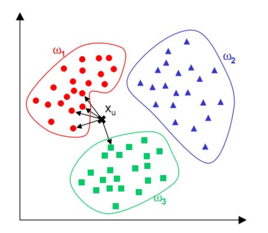
### 二、算法原理：
        图中，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。该方法的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 
 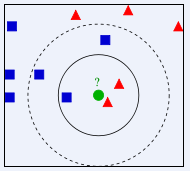KNN算法不仅可以用于分类，还可以用于回归。通过找出一个样本的k个最近邻居，将这些邻居的属性的平均值赋给该样本，就可以得到该样本的属性。更有用的方法是将不同距离的邻居对该样本产生的影响给予不同的权值(weight)，如权值与距离成反比。
### 三、特征空间相似性计算：样本距离
在KNN算法中，常用的距离有三种，分别为曼哈顿距离、欧式距离和闵可夫斯基距离。 
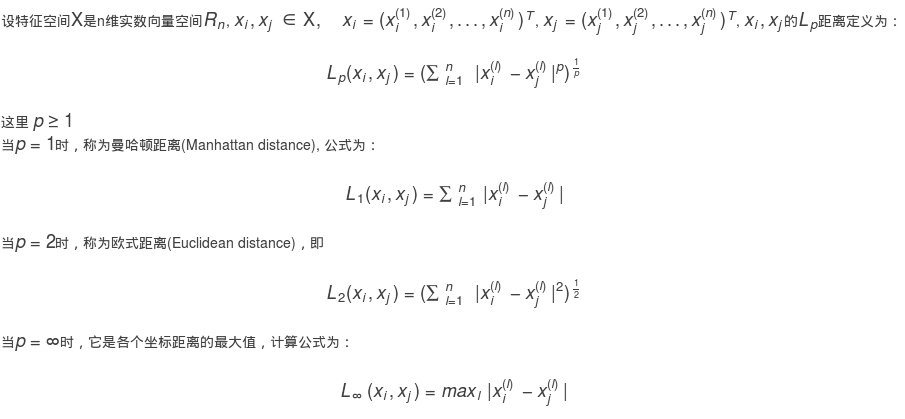
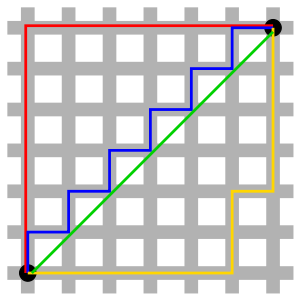
### 四、kNN过程：
    * 1. 准备数据，对数据进行预处理
    * 2. 选用合适的数据结构存储训练数据和测试元组
    * 3. 设定参数，如k
    *4.维护一个大小为k的的按距离由大到小的优先级队列，用于存储最近邻训练元组。随机从训练元组中选取k个元组作为初始的最近邻元组，分别计算测试元组到这k个元组的距离，将训练元组标号和距离存入优先级队列
    *  5. 遍历训练元组集，计算当前训练元组与测试元组的距离，将所得距离L 与优先级队列中的最大距离Lmax
    * 6. 进行比较。若L>=Lmax，则舍弃该元组，遍历下一个元组。若L < Lmax，删除优先级队列中最大距离的元组，将当前训练元组存入优先级队列
    * 7. 遍历完毕，计算优先级队列中k 个元组的多数类，并将其作为测试元组的类别。
    * 8. 测试元组集测试完毕后计算误差率，继续设定不同的k值重新进行训练，最后取误差率最小的k 值
### 五、kNN算法特点：
* （1）优点
    * ①简单，易于理解，易于实现，无需参数估计，无需训练;
    * ②精度高，对异常值不敏感（个别噪音数据对结果的影响不是很大）;
    * ③适合对稀有事件进行分类;
    * ④特别适合于多分类问题(multi-modal,对象具有多个类别标签)，KNN要比SVM表现要好.
* （2）缺点
    * ①对测试样本分类时的计算量大，空间开销大，因为对每一个待分类的文本都要计算它到全体已知样本的距离，才能求得它的K个最近邻点。目前常用的解决方法是事先对已知样本点进行剪辑，事先去除对分类作用不大的样本;
    * ②可解释性差，无法给出决策树那样的规则;
    * ③最大的缺点是当样本不平衡时，如一个类的样本容量很大，而其他类样本容量很小时，有可能导致当输入一个新样本时，该样本的K个邻居中大容量类的样本占多数。该算法只计算“最近的”邻居样本，某一类的样本数量很大，那么或者这类样本并不接近目标样本，或者这类样本很靠近目标样本。无论怎样，数量并不能影响运行结果。可以采用权值的方法（和该样本距离小的邻居权值大）来改进;
    * ④消极学习方法。

### 六、《机器学习实战》书上的预测过程：

In [10]:
from numpy import *
import operator
from os import listdir

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
    
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1)) #tile:numpy中函数，用于重复扩展ndarray,

    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals
   
def datingClassTest():
    hoRatio = 0.10      #hold out 10%
    datingDataMat,datingLabels = file2matrix('Ch02/datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #normMat=datingDataMat
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the classifier came back with: %d, the real answer is: %d' % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print( "the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)

datingClassTest()

'''tile函数：
a=[0,1,2]     #这就是那个模板
b=tile(a,2)    #b就是通过模板a,构建的另一个数组,也就是我们想要的目标
print(b)
得到的结果是
array([0,1,2,0,1,2])
'''

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

'tile函数：\na=[0,1,2]     #这就是那个模板\nb=tile(a,2)    #b就是通过模板a,构建的另一个数组,也就是我们想要的目标\nprint(b)\n得到的结果是\narray([0,1,2,0,1,2])\n'

### 七、kNN案例用sklearn+numpy实现分类

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
#  以下先读出数据到datingDataMat和datingLabels中
a=np.loadtxt('Ch02/datingTestSet2.txt',delimiter="\t")
datingDataMat=a[:,:3]
datingLabels=a[:,-1]

# 以下作归一化处理
X= preprocessing.scale(datingDataMat)
#X= datingDataMat

#以下划分训练集和测试集X_train、Y_train训练集；X_test、Y_test测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, datingLabels, test_size=0.30, random_state=42)

#以下进行分类测试
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)
y_predict = knn.predict(X_test) #测试集中的预测分类值
y_predict=y_predict.reshape(300,1)
probility=knn.predict_proba(X_test) #测试集中每个样本不同分类的概率

#测试集预测分类结果展示
y_exst=Y_test.reshape(300,1)
res= np.concatenate((y_exst,y_predict,probility),axis=1)#样本原来分类、预测分类、样本属于1的概率、样本属于2的概率、样本属于3的概率
np.set_printoptions(threshold=np.nan)
print(res)

#模型的评分标准
score=knn.score(X_test,Y_test,sample_weight=None)
print(score)

0.9366666666666666


In [81]:
from sklearn import datasets
import numpy as np
isr=datasets.load_iris()
dt=isr.data;
tg=isr.target
print(tg)
print(dt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 